## ROC Curve 

In [1]:
# example of a roc curve for a predictive model
from sklearn.datasets import make_classification
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import roc_curve
from matplotlib import pyplot

In [4]:
# generate 2 class dataset

X, y = make_classification(n_samples=1000, n_classes=2, random_state=1)

In [5]:
# split into train/test sets

trainX, testX, trainy, testy = train_test_split(X, y, test_size=0.5, random_state=2)

In [6]:
# fit a model

model = LogisticRegression(solver='lbfgs')
model.fit(trainX, trainy)


LogisticRegression()

In [10]:
y_pred = model.predict(testX)
y_pred

array([1, 1, 0, 0, 1, 1, 0, 0, 1, 1, 0, 1, 0, 1, 1, 1, 0, 1, 0, 1, 1, 0,
       0, 1, 0, 1, 1, 1, 0, 1, 1, 1, 0, 1, 0, 0, 1, 1, 1, 0, 0, 0, 0, 1,
       0, 1, 1, 1, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0,
       0, 0, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 1, 1, 0, 1, 0,
       0, 1, 1, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 0, 1,
       0, 0, 0, 1, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0,
       1, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0,
       1, 0, 0, 1, 0, 1, 0, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 1, 1, 0, 0, 1,
       1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 0, 1, 0, 0, 1, 1, 1, 1,
       0, 1, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0,
       1, 0, 0, 1, 0, 1, 0, 1, 1, 0, 1, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1,
       0, 0, 1, 0, 1, 0, 0, 0, 1, 1, 0, 1, 1, 0, 1,

In [7]:
# predict probabilities
yhat = model.predict_proba(testX)
yhat

array([[4.02731514e-03, 9.95972685e-01],
       [2.00515726e-03, 9.97994843e-01],
       [9.94701169e-01, 5.29883066e-03],
       [8.47625806e-01, 1.52374194e-01],
       [1.66665036e-03, 9.98333350e-01],
       [4.99938552e-01, 5.00061448e-01],
       [9.80236861e-01, 1.97631392e-02],
       [9.76536616e-01, 2.34633843e-02],
       [1.79993032e-02, 9.82000697e-01],
       [2.93534820e-01, 7.06465180e-01],
       [9.95837980e-01, 4.16201961e-03],
       [2.53553400e-01, 7.46446600e-01],
       [9.92334325e-01, 7.66567488e-03],
       [3.80412811e-02, 9.61958719e-01],
       [6.47854323e-02, 9.35214568e-01],
       [1.92346446e-01, 8.07653554e-01],
       [8.55196114e-01, 1.44803886e-01],
       [4.34676792e-02, 9.56532321e-01],
       [8.43042493e-01, 1.56957507e-01],
       [5.50912415e-02, 9.44908759e-01],
       [1.32992380e-01, 8.67007620e-01],
       [5.89717936e-01, 4.10282064e-01],
       [9.79518433e-01, 2.04815673e-02],
       [3.32906248e-01, 6.67093752e-01],
       [9.957366

In [8]:
# retrieve just the probabilities for the positive class
pos_probs = yhat[:, 1]

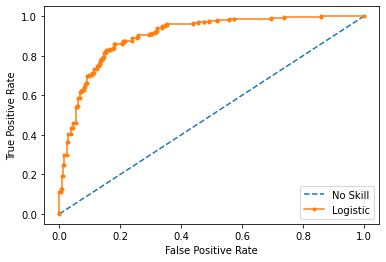

In [16]:
# plot no skill roc curve
pyplot.plot([0, 1], [0, 1], linestyle='--', label='No Skill')
# calculate roc curve for model
fpr, tpr, _ = roc_curve(testy, pos_probs)
# plot model roc curve
pyplot.plot(fpr, tpr, marker='.', label='Logistic')
# axis labels
pyplot.xlabel('False Positive Rate')
pyplot.ylabel('True Positive Rate')
# show the legend
pyplot.legend()
# show the plot
pyplot.show()

In [11]:
from sklearn.metrics import roc_auc_score

In [17]:
print("The Area under the Curve is : ",roc_auc_score(testy,pos_probs))

The Area under the Curve is :  0.9028205128205128
